In [44]:
import skimage
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage import feature
from time import time
import collections
%matplotlib inline

In [45]:
def visualize(images):
    plt.figure(figsize=(20, 20))
    for i in xrange(len(images)):
        plt.subplot(1, len(images), i + 1)
        io.imshow(images[i])
    plt.show()

In [46]:
def get_possible_d_indexes(dist, d_lower, d_upper, hint):
    indexes = []
    if (hint > 0 and hint + 2 < len(dist) and dist[hint + 2] > d_lower and dist[hint - 2] < d_upper):
        lower_index = hint - 2
        upper_index = hint + 2
    else:
        lower_index = 0
        upper_index = len(dist) - 1
        mid_index = lower_index
        while (upper_index - lower_index > 1):
            mid_index = (lower_index + upper_index) // 2
            if dist[mid_index] < d_lower:
                lower_index = mid_index
            else:
                upper_index = mid_index
        while (dist[lower_index] > d_lower and lower_index > 0):
            lower_index -= 1
        while (dist[upper_index] < d_upper and upper_index < len(dist) - 1):
            upper_index += 1
    for index in xrange(lower_index, upper_index):
        newhint = 0
        hints = 0
        if dist[index] >= d_lower and dist[index] <= d_upper:
            newhint += index
            hints += 1
            indexes.append(index)
        if hints > 0:
            newhint /= hints
        if newhint > 0:
            hint = newhint
    return indexes, hint

In [47]:
def houghlines(image, theta, dist, accuracy):
    hough_matrix = np.zeros((len(dist), len(theta)))
    print (hough_matrix.shape)
    for i in xrange(image.shape[0]):
        for j in xrange(image.shape[1]):
            if not image[i][j] or (i + j) % 3 != 0:
                continue
            hint = 0
            # lens = []
            for th_index in xrange(len(theta)):
                th = theta[th_index]
                d_lower = i * np.cos(th) + j * np.sin(th) - accuracy
                d_upper = i * np.cos(th) + j * np.sin(th) + accuracy
                d_indexes_list, hint = get_possible_d_indexes(dist, d_lower, d_upper, hint)
                #for d_index in xrange(len(dist)):
                #    th = theta[th_index]
                #    d = dist[d_index]
                #    if np.abs(i * np.cos(th) + j * np.sin(th) - d) < accuracy:
                #        hough_matrix[d_index][th_index] += 1
                # lens.append(len(d_indexes_list))
                for d_index in d_indexes_list:
                    hough_matrix[d_index][th_index] += 1
            # print (lens)
    return hough_matrix, theta, dist
                        
                        
     

In [48]:
def find_lines_scikit_hough_line(image, sigma=2.2):
    gray_image = skimage.color.rgb2gray(image)
    featured_image = feature.canny(gray_image, sigma=sigma)
    visualize([image, gray_image, featured_image])   
    h, theta, d = skimage.transform.hough_line(featured_image, np.linspace(-np.pi/2, np.pi/2, 1000))
    print (theta.shape)
    print (d.shape)
    plt.figure(figsize=(10, 10))
    plt.imshow(np.log(1 + h),
             extent=[10*np.rad2deg(theta[-1]), 10*np.rad2deg(theta[0]),
                     d[-1], d[0]],
             cmap=plt.cm.gray)
    plt.show()
    h_cleared = get_peaks(h.copy())
    plt.figure(figsize=(10, 10))
    plt.imshow(np.log(1 + h_cleared),
             extent=[10*np.rad2deg(theta[-1]), 10*np.rad2deg(theta[0]),
                     d[-1], d[0]],
             cmap=plt.cm.gray)
    plt.show()

In [49]:
def find_lines_houghlines(image,  theta, dist, accuracy, sigma=2.5):
    gray_image = skimage.color.rgb2gray(image)
    featured_image = feature.canny(gray_image, sigma=sigma)
    visualize([image, gray_image, featured_image])   
    t1 = time()
    h, theta, d = houghlines(featured_image, theta, dist, accuracy)
    t2 = time()
    print (t2 - t1)
    plt.figure(figsize=(10, 10))
    plt.imshow(np.log(1 + h),
             extent=[10*np.rad2deg(theta[-1]), 10*np.rad2deg(theta[0]),
                     d[-1], d[0]],
             cmap=plt.cm.gray)
    plt.show()

In [50]:
def get_stat(image):
    c = collections.Counter()
    avg = 0.0
    count = 0.0
    for i in xrange(image.shape[0]):
        for j in xrange(image.shape[1]):
            c[image[i][j]] += 1
            if image[i][j] > 0:
                avg += image[i][j]
                count += 1
    return c, avg / count

In [51]:
def clean_img(image, avg):
    for i in xrange(image.shape[0]):
        for j in xrange(image.shape[1]):
            if image[i][j] < avg:
                image[i][j] = 0

In [72]:
def make_iteration(image):
    buff = np.zeros((image.shape[0], image.shape[1]))
    for i in xrange(1, image.shape[0] - 1):
        for j in xrange(1, image.shape[1] - 1):
            if (image[i][j] < 7):
                continue
            present = (image[i][j] * 7) // 8
            count = 0
            for di in xrange(-1, 2):
                for dj in xrange(-1, 2):
                    if image[i + di][j + dj] >= image[i][j]:
                        count += 1
            
            for di in xrange(-1, 2):
                for dj in xrange(-1, 2):
                    if image[i + di][j + dj] >= image[i][j]:
                        buff[i + di][j + dj] += present / count
            buff[i][j] -= present
    image = buff

In [74]:
def get_peaks(image):
    image = 8 * image
    for it in xrange(10):
        make_iteration(image)
    return image // 8

In [53]:
pics = ['line1.png', 'line2.png', 'line3.png']

In [54]:
pictures = [io.imread(pic) for pic in pics]

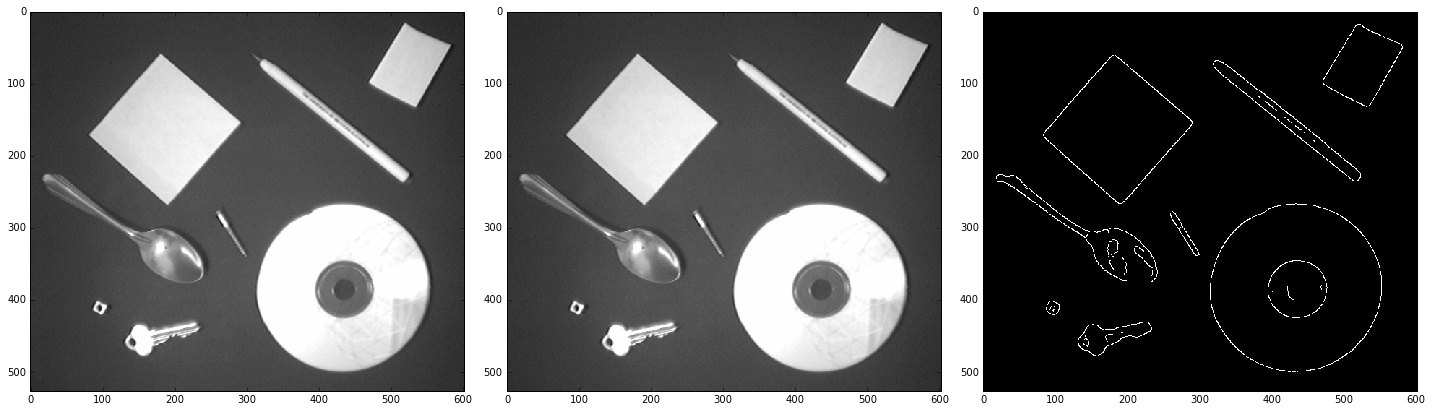

(1000,)
(1600,)


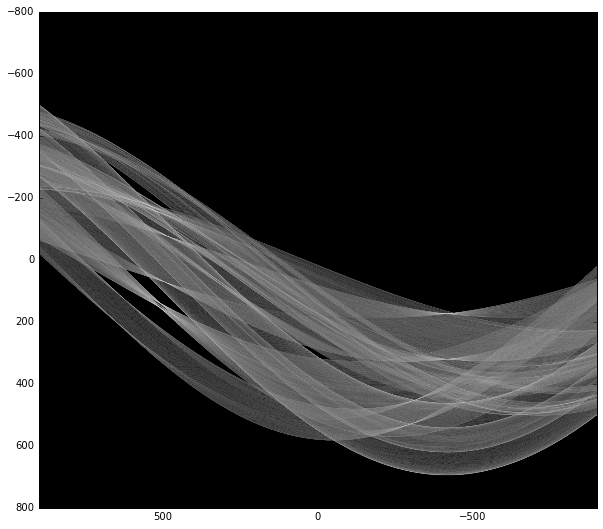

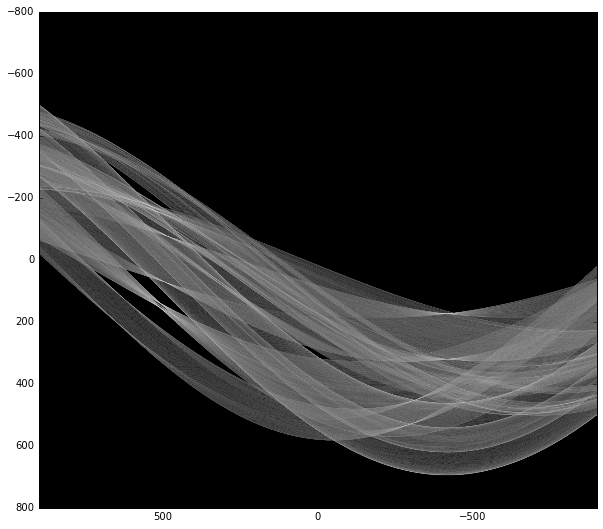

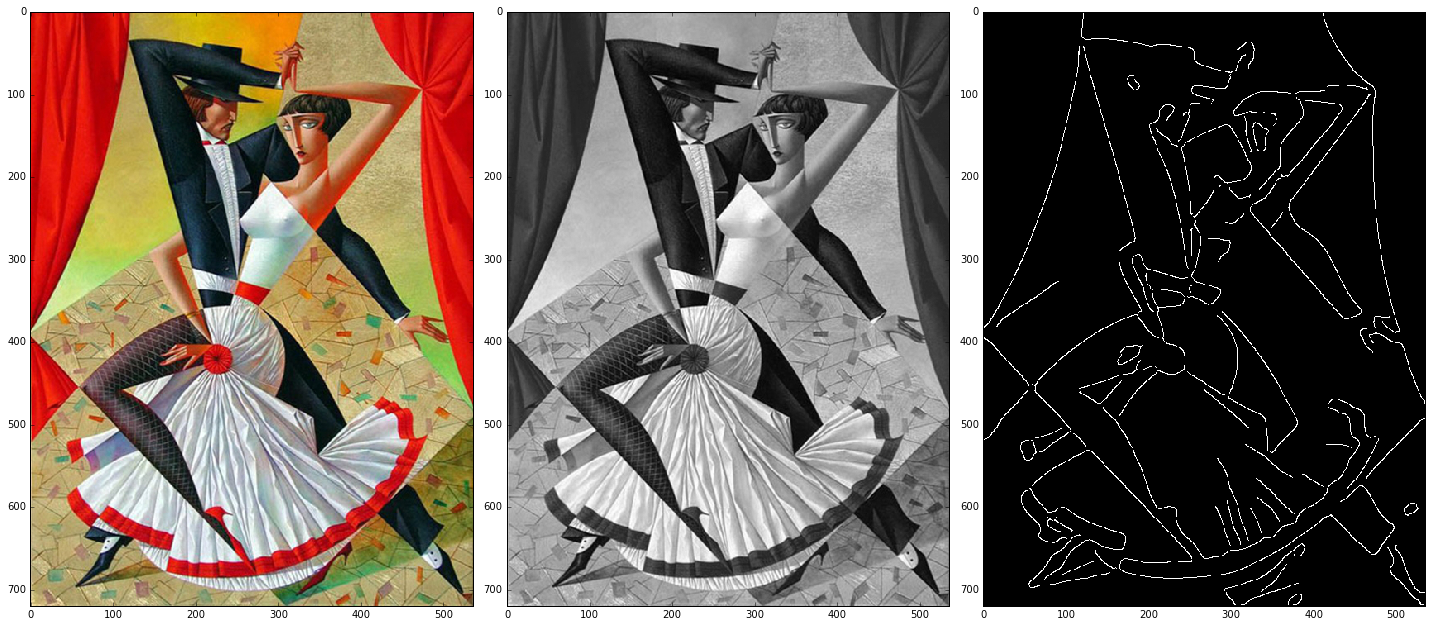

(1000,)
(1796,)


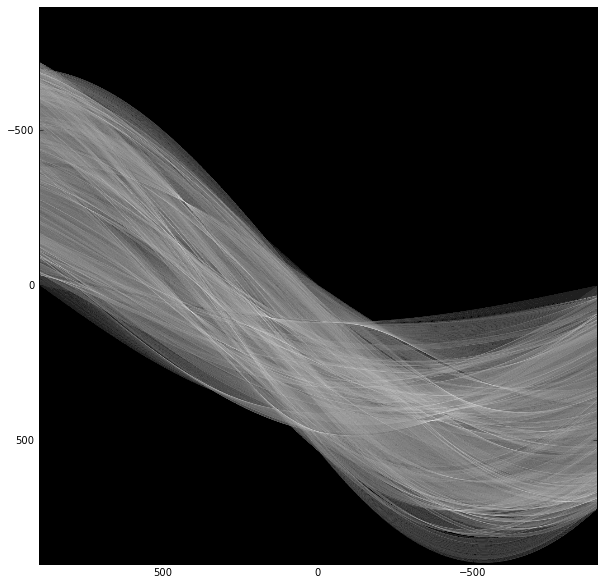

KeyboardInterrupt: 

In [75]:
find_lines_scikit_hough_line(pictures[0], sigma=3)
find_lines_scikit_hough_line(pictures[1], sigma=4)
find_lines_scikit_hough_line(pictures[2], sigma=2)

In [ ]:
find_lines_houghlines(pictures[0],\
                          np.linspace(-np.pi/2, np.pi/2, 1500),\
                          np.linspace(-800, 800, 1500), 0.8, 3)


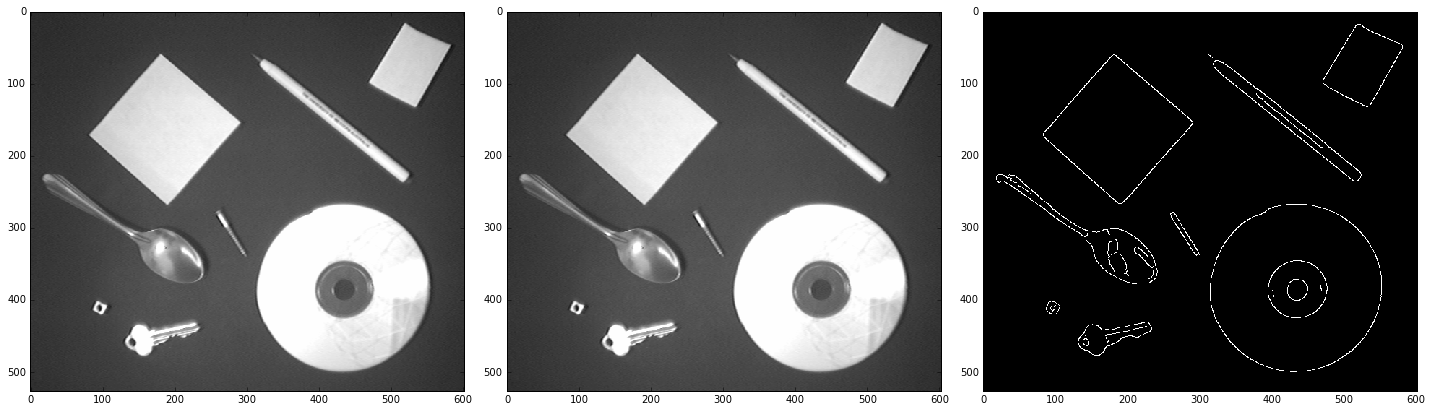

(1500, 1500)


KeyboardInterrupt: 

In [38]:
for picture in [pictures[0]]:
    find_lines_houghlines(picture, np.linspace(-np.pi/2, np.pi/2, 1500), np.linspace(-800, 800, 1500), 0.5)

In [61]:
print (xrange(-1, 1))

xrange(-1, 1)


In [62]:
for i in xrange(-1, 2):
    print (i)

-1
0
